In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import seaborn as sns
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import mean_squared_error

In [2]:
data=pd.read_excel("jharkhand.xlsx")

In [3]:
data['Timestamp']=pd.to_datetime(data.Timestamp)

In [4]:
df=data.iloc[:]

In [5]:
cols=list(df)[1:2]

In [6]:
dataset = df[cols].astype(float)

In [7]:
scaler=MinMaxScaler(feature_range=(0,1))
dataset=scaler.fit_transform(dataset)

In [ ]:
# Using 400 days as train and 58 days for testing

In [8]:
train,test = dataset[:38400],dataset[38400:]

In [9]:
n_future=1
n_past=96

In [10]:
def splitter(dataset,seq_size):
    X=[]
    Y=[]
    for i in range(len(dataset) - seq_size-1):
        window=dataset[i:(i+seq_size),0]
        X.append(window)
        Y.append(dataset[i+seq_size,0])
    return np.array(X),np.array(Y)


In [11]:
seq_size=96

In [12]:
trainX,trainY=splitter(train,seq_size)
testX,testY=splitter(test,seq_size)

In [13]:
f = pd.DataFrame(trainX)
f['96'] = trainY
f

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,0.266341,0.301877,0.179182,0.199654,0.218715,0.206993,0.163051,0.160461,0.149692,0.110515,...,0.264421,0.292833,0.284014,0.298059,0.340851,0.314706,0.246415,0.234598,0.339760,0.303974
1,0.301877,0.179182,0.199654,0.218715,0.206993,0.163051,0.160461,0.149692,0.110515,0.145786,...,0.292833,0.284014,0.298059,0.340851,0.314706,0.246415,0.234598,0.339760,0.303974,0.325076
2,0.179182,0.199654,0.218715,0.206993,0.163051,0.160461,0.149692,0.110515,0.145786,0.136654,...,0.284014,0.298059,0.340851,0.314706,0.246415,0.234598,0.339760,0.303974,0.325076,0.290367
3,0.199654,0.218715,0.206993,0.163051,0.160461,0.149692,0.110515,0.145786,0.136654,0.164269,...,0.298059,0.340851,0.314706,0.246415,0.234598,0.339760,0.303974,0.325076,0.290367,0.310150
4,0.218715,0.206993,0.163051,0.160461,0.149692,0.110515,0.145786,0.136654,0.164269,0.200376,...,0.340851,0.314706,0.246415,0.234598,0.339760,0.303974,0.325076,0.290367,0.310150,0.277126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38298,0.642676,0.709114,0.670082,0.649994,0.697505,0.703520,0.702173,0.822331,0.707753,0.678482,...,0.875958,0.772566,0.851645,0.786918,0.842311,0.751283,0.728572,0.676694,0.558381,0.572545
38299,0.709114,0.670082,0.649994,0.697505,0.703520,0.702173,0.822331,0.707753,0.678482,0.685340,...,0.772566,0.851645,0.786918,0.842311,0.751283,0.728572,0.676694,0.558381,0.572545,0.607773
38300,0.670082,0.649994,0.697505,0.703520,0.702173,0.822331,0.707753,0.678482,0.685340,0.713194,...,0.851645,0.786918,0.842311,0.751283,0.728572,0.676694,0.558381,0.572545,0.607773,0.612672
38301,0.649994,0.697505,0.703520,0.702173,0.822331,0.707753,0.678482,0.685340,0.713194,0.769565,...,0.786918,0.842311,0.751283,0.728572,0.676694,0.558381,0.572545,0.607773,0.612672,0.625147


In [14]:
trainX = np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX = np.reshape(testX,(testX.shape[0],1,testX.shape[1]))

In [15]:
model=Sequential()
model.add(LSTM(50,activation='relu',return_sequences=True, input_shape=(None,seq_size)))
model.add(LSTM(50,activation='relu'))
model.add(Dense(32))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')


In [16]:
model.fit(trainX,trainY,validation_data=(testX,testY),verbose=2,epochs=10)

Epoch 1/10
1197/1197 - 11s - loss: 0.0052 - val_loss: 0.0041 - 11s/epoch - 10ms/step
Epoch 2/10
1197/1197 - 5s - loss: 0.0035 - val_loss: 0.0038 - 5s/epoch - 5ms/step
Epoch 3/10
1197/1197 - 4s - loss: 0.0034 - val_loss: 0.0046 - 4s/epoch - 4ms/step
Epoch 4/10
1197/1197 - 5s - loss: 0.0033 - val_loss: 0.0037 - 5s/epoch - 4ms/step
Epoch 5/10
1197/1197 - 4s - loss: 0.0033 - val_loss: 0.0042 - 4s/epoch - 4ms/step
Epoch 6/10
1197/1197 - 5s - loss: 0.0033 - val_loss: 0.0039 - 5s/epoch - 4ms/step
Epoch 7/10
1197/1197 - 5s - loss: 0.0033 - val_loss: 0.0036 - 5s/epoch - 4ms/step
Epoch 8/10
1197/1197 - 6s - loss: 0.0033 - val_loss: 0.0037 - 6s/epoch - 5ms/step
Epoch 9/10
1197/1197 - 5s - loss: 0.0033 - val_loss: 0.0046 - 5s/epoch - 4ms/step
Epoch 10/10
1197/1197 - 5s - loss: 0.0033 - val_loss: 0.0036 - 5s/epoch - 4ms/step


In [17]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

171/171 [==============================] - 0s 2ms/step


In [18]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

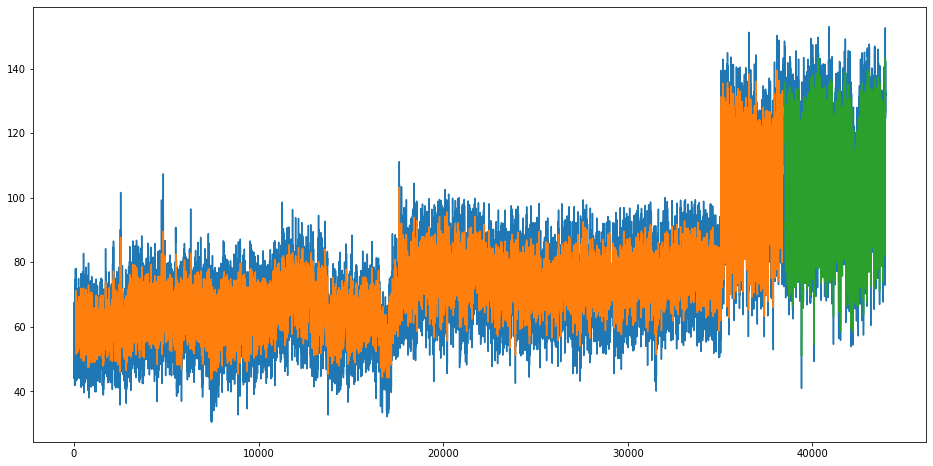

In [30]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(16,8))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [28]:
def mean_squared_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.square((y_true - y_pred) / y_true)) * 100

In [21]:
mspe = mean_squared_percentage_error(testY[0],testPredict[:,0])
print(f'Mean Squared Percentage Error: {mspe:.2f}%')

Mean Squared Percentage Error: 0.48%
